In [1]:
#TODO: Add karthik's questions
#TODO: Phrase questions and answers (1. done, todo: 2. and 3.)
#TODO: 1. Group all plots in one image
#TODO: just before 1.c, we can modify the question to be more challenging.
#TODO: just before 3, 3 todos for 2.
#TODO: 3. Two nodes 
#TODO: rephrase the questions, explain what is expected from the students ...

In [2]:
!which python
!pwd

/Users/tristantorchet/Desktop/ITON/.venv/bin/python
/Users/tristantorchet/Desktop/ITON


In [3]:
# !pip3 install scipy

In [4]:
# !pip3 install PyQt6

# Table of contents:

* [1: Introduction to Neuroscience and Circuits](#I2N&C)
    * [1.a Nernst Equation](#nerst-equation) 
    * [1.b Capacitor RC Circuit](#RC)
    * [1.c Making the parallel](#parallel)
* [2: Adding complexity](#complexity)
    * [2.a Goldman-Hodgkin-Katz (GHK) Equation](#GHK)
    * [2.b 3 conductances model](#3conductances)
* [3: Passive cable equations](#passive)

In [18]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from IPython.display import display, clear_output

from scipy.constants import R, physical_constants

In [6]:
# Faraday constant (F) from scipy's physical_constants
F_constant = physical_constants['Faraday constant'][0]

# Define constants
T_default = 310  # Temperature in Kelvin (37°C, human body temperature)
R_constant = R  # Universal gas constant in J/(mol·K)

# 1. Introduction to Neuroscience and Circuits <a name="I2N&C"></a>

## 1.a Nernst Equation
The Nernst equation calculates the equilibrium potential (membrane potential at which there is no net flow of ions) for a single ion based on its concentration gradient across the membrane.
The Nernst equation is given by:
$$E_{ion} = \frac{RT}{zF} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$
where:
- $E_{ion}$ is the equilibrium potential for the ion in mV,
- $R$ is the universal gas constant (8.314 J/(mol·K)),
- $T$ is the temperature in Kelvin,
- $z$ is the valence of the ion (e.g., +1 for sodium, +2 for calcium),
- $F$ is the Faraday constant (96485 C/mol),
- $[ion]_{out}$ and $[ion]_{in}$ are the extracellular and intracellular concentrations of the ion, respectively,
- The logarithm is natural (base e).

In [7]:
# Nernst equation function
def nernst_potential(z, Cin, Cout, T):
    return (R_constant * T / (z * F_constant)) * np.log(Cout / Cin) * 1000  # in mV

In [8]:
#TODO: add slider animation

### 1.b Capacitor RC Circuit <a class="anchor" id="RC"></a>

**Exercise**:
  - Simulate the charging of an RC circuit using numerical methods.

**Model**:
- The voltage and the current of a capacitor are related by the equation $I = C \frac{dV}{dt}$, where $I$ is the current, $C$ is the capacitance, and $V$ is the voltage across the capacitor.
- The voltage across the resistor is given by Ohm's law: $V = I \cdot R$, where $V$ is the voltage, $I$ is the current, and $R$ is the resistance.

<img src="images_ex1/rc_circuit.png" width="500"/>

- Some useful relationships for this analysis are Ohm’s law and Kirchhoff’s laws.
  - Ohm’s Law: $V = I · R$ (voltage equals current times resistance)
  - Kirchhoff’s Current Law ($KCL$): The sum of all currents entering and leaving any node in a circuit is zero.
  - Kirchhoff’s Voltage Law ($KVL$): The sum of all voltages around a closed loop is equal to zero.
<img src="images_ex1/KCL_KVL.jpeg">

### Circuit Analysis
**Question**: Using KVL analyze the RC-series circuit and write the differential equation for the circuit.
**Answer**:
Using KVL, we can write the following differential equation for the circuit:
$\begin{aligned}
    V = V_R + V_C\\
    \end{aligned}$
Using Ohm's law, we get:
$\begin{aligned}
    V = I*R + V_C \\
    \end{aligned}$
Using the relationship between the current and the voltage across the capacitor, we get:
$\begin{aligned}
    V = C * \frac{dV_C}{dt} * R + V_C \\
    \end{aligned}$
Finally, we get the following differential equation:
$\begin{aligned}
    \frac{dV_C}{dt} = \frac{V - V_C}{R * C} \\
    \end{aligned}$

There are two ways of solving this differential equation. You can use Analytical methods or Numerical methods.

### Analytical solution 

This is a first-order linear differential equation that can be solved analytically to find $V_C(t)$.

**Charging**: Assuming that 
- initially the capacitor is discharged i.e. $V_C(t=0) = 0$
- the voltage source is $V$

The solution is $V_C(t) = V * (1 - e^{-t / (R * C)})$

**Discharging**: Assuming that

- initially the capacitor is charged i.e. $V_C(t=0) = V_0$
- the voltage source is $0$

The solution is $V_C(t) = V_0 * e^{-t / (R * C)}$ 

### Numerical solution:
We can also simulate the charging and the discharging of the RC circuit using numerical methods like Euler's method:
Approximating $\frac{dV_C}{dt}$ as $\frac{V_C(t + \Delta t) - V_C(t)}{\Delta t}$, we get the following update rule: 
$\begin{aligned}
    \frac{dV_C}{dt} \approx \frac{V_C(t + \Delta t) - V_C(t)}{\Delta t} = \frac{V - V_C(t)}{R * C} \\
    \end{aligned}$ 
$\begin{aligned}
    \Leftrightarrow V_C(t + \Delta t) = V_C(t) + \frac{V - V_C(t)}{R * C} * \Delta t \\
    \end{aligned}$
$\begin{aligned}
    \Leftrightarrow V_C(t + \Delta t) = (1 - \frac{\Delta t}{R * C}) * V_C(t) + \frac{\Delta t}{R * C} * V \\
    \end{aligned}$
  
Rearranging terms, we get $V_C(t + \Delta t) = V_C(t) + \frac{V - V_C(t)}{R * C} * \Delta t$ = $(1 - \frac{\Delta t}{R * C}) * V_C(t) + \frac{\Delta t}{R * C} * V$
For small $x$ we can approximate $(1-x) \approx e^{-x}$, so the equation becomes $V_C(t + \Delta t) = e^{-\frac{\Delta t}{R * C}} * V_C(t) + (1 - e^{-\frac{\Delta t}{R * C}}) * V$
We get a <ins>unique</ins> equation for the charging and discharging of the capacitor.

In [10]:
# Complete the function below to simulate the charging of an RC circuit using Euler's method
import numpy as np

# We want to simulate 100 ms of charging with a time step of 1 ms, so you need to define the time array to have enough points to cover this duration
t = np.arange(0, 100, 1)  # Time array from 0 to 100 ms with a step of 1 ms (WARNING: unit in ms)


Vs = 5  # The value of the voltage source is 1 V
V0 = 0  # The initial voltage across the capacitor is 0 V
R = 10000  # The resistance is 10 kOhm
C = 0.000001 # The capacitance is 1 mF

In [ ]:
def rc_euler(Vs, V0, R, C, dt, t):
    V_t = np.zeros(t.shape)
    V_t[0] = V0
    for i in range(1, len(t)):
        V_t[i] = ... 
        # Answer: 
        # V_t[i] = (1 - np.exp(-dt / (R*C)))*Vs + np.exp(-dt / (R * C)) * V_t[i - 1]
    return V_t

In [11]:
def rc_charging_exact(Vs, R, C, t):
    return Vs * (1 - np.exp(-(t/1000) / (R * C)))

def rc_discharging_exact(V0, R, C, t):
    return V0 * np.exp(-(t/1000) / (R * C))

In [12]:
# Simulate the charging and discharging of the RC circuit
dt = 0.001  # Time step of 1 ms

# We define the initial conditions for the charging and discharging
Vs_charging, Vs_discharging = 5, 0
V0_charging, V0_discharging = 0, 3


# Question: simulate the charging and discharging of the RC circuit using Euler's method and the exact solution
# Use the previously defined rc_euler, rc_charging_exact, rc_discharging_exact, Vs_charging, Vs_discharging, V0_charging, V0_discharging, R, C, and t 
Vc_euler_charging    = ...
Vc_euler_discharging = ...
Vc_exact_charging    = ...
Vc_exact_discharging = ...

# Answer:
# Vc_euler_charging    = rc_euler(Vs_charging,    V0_charging,    R, C, dt, t)  # Use a time step of 1 ms
# Vc_euler_discharging = rc_euler(Vs_discharging, V0_discharging, R, C, dt, t)  # Use a time step of 1 ms
# Vc_exact_charging    = rc_charging_exact(   Vs_charging,    R, C, t)  # Use a time step of 1 ms
# Vc_exact_discharging = rc_discharging_exact(V0_discharging, R, C, t)  # Use a time step of 1 ms


You generated the data for the charging and discharging of the RC circuit, you can plot the results and compare the numerical solution using Euler's method with the exact solution.

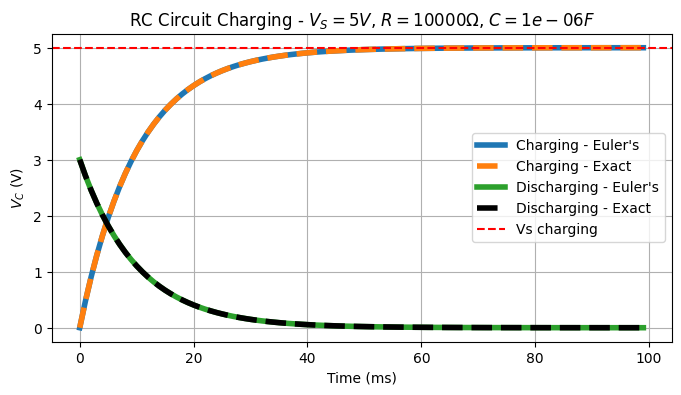

In [14]:
import matplotlib.pyplot as plt

# clear the plot
plt.close()
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(800*px, 400*px))
ax.plot(t, Vc_euler_charging,    label='Charging - Euler\'s',    linestyle='solid', linewidth=400*px)
ax.plot(t, Vc_exact_charging,    label='Charging - Exact',       linestyle='dashed', linewidth=400*px)
ax.plot(t, Vc_euler_discharging, label='Discharging - Euler\'s', linestyle='solid', linewidth=400*px)
ax.plot(t, Vc_exact_discharging, label='Discharging - Exact',    linestyle='dashed', linewidth=400*px, color='black')
# plot a line at Vs
ax.axhline(y=Vs, color='r', linestyle='--', label='Vs charging')
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$V_C$ (V)')
ax.set_title(fr'RC Circuit Charging - $V_S={Vs} V$, $R={R} \Omega$, $C={C} F$')
ax.legend()
plt.grid()
plt.show()

**Questions**: What can you say about Euler's method compared to the exact solution?
**Answer**: They are very close to each other. The Euler's method is a good approximation for the charging and discharging of the RC circuit.

To get a better understanding of the charging and discharging of the RC circuit, you can use an interactive plot to modify the values of $V_S$, $R$, $C$.

In [19]:
from utils_ex1.utils import plot_vc_slider

Vs_default = 5
R_default = 10000
C_default = 0.000001
V0_default = 0
plt.close()
plot_vc_slider(Vs_default, R_default, C_default, V0_default)

<IPython.core.display.Javascript object>

Using the previous interactive plot,
**Questions**: What happens when you increase the voltage source $V_S$ (while keeping the resistance $R$ and the capacitance $C$ constant)?
**Answer**: The capacitor saturating voltage also increases.
**Questions**: What happens when you increase the resistance $R$ (while keeping the capacitance $C$ and the voltage source $V_S$ constant)?
**Answer**: The capacitor voltage takes more time to reach saturation.
**Question**: What happens when you increase the capacitance $C$ (while keeping the resistance $R$ and the voltage source $V_S$ constant)?
Reset the plot by clicking the "Reset" button.
Double the capacitor value, take a screenshot
Reset the plot
Double the resistance value, take a screenshot
**Question**: Compare these screenshots. What do you observe? Why?
**Answer**: The plots are identical. The quantity $R \cdot C$, which determines the dynamic, is the same for both cases.

## Introducing the time constant $\tau = RC$
When you look at the discretized equation for the RC circuit: $V_C(t + \Delta t) = e^{-\frac{\Delta t}{R * C}} * V_C(t) + (1 - e^{-\frac{\Delta t}{R * C}}) * V$, you can see that the term $\frac{1}{R * C}$ appears twice. This term is called the time constant $\tau = R * C$ of the circuit.
This quantity is really important and gives you an idea of how fast the capacitor charges or discharges.

If you take the analytical solution of the charging of the capacitor: $V_C(t) = V * (1 - e^{-t / (R * C)})$, you can see that the voltage across the capacitor at time $t = \tau = RC$ is equal to $V_C(t=\tau) = V * (1 - e^{-1}) = 0.63 * V$. You can then see the time constant it takes the voltage of a fully discharged capacitor to reach 63% of the voltage source.

In [20]:
from utils_ex1.utils import plot_vc_tc_slider

plt.close()
plot_vc_tc_slider()

<IPython.core.display.Javascript object>

**Questions**: Varying $R$ and $C$, what can you say about the intersections of the tangent line and the vertical line at $V_S$ and of $V_C$ and the horizontal line at $0.63*V_S$?
**Answer**: Both intersections occur at the same time $ t = R \cdot C$.

#TODO: this could be changed for the "If you take ..."
**Question**: On the cell above change the value of `plot_vertical_tc` to `True` and run the cell. What do you observe? Does it correspond to your previous answer? 
**Answer**: Yes.

### 1.c Making the parallel. <a class="anchor" id="parallel"></a>

Now that you know about the Nernst equation and the RC circuit, let's combine these concepts to understand the passive properties of a neuron membrane.
The membrane of a neuron can be modeled as an electrical circuit with a capacitor in parallel with a resistors in series with a voltage source.
- the capacitor represents the lipid bilayer of the membrane,
- the voltage source represents the Nernst potential for a given ion, 
- the resistors represent the ion channels in the membrane.

We use a current source $I_{in}$ to inject current into the neuron through the membrane, and the membrane potential changes over time.


<img src="images_ex1/RC_parallel_light.drawio.png" width="1000"/>


**Exercise**:
- Using KCL, write the equation for the membrane potential of a neuron.
- Using Euler's method, simulate the membrane potential of a neuron with multiple ion channels.


# 2. Adding complexity <a class="anchor" id="complexity"></a>

## 2.a Goldman-Hodgkin-Katz (GHK) Equation <a class="anchor" id="GHK"></a>
The Goldman-Hodgkin-Katz (GHK) equation is an extension of the Nernst equation that accounts for the permeability of the membrane to multiple ions. 
It calculates the membrane potential based on the relative permeabilities of ions (sodium, potassium, and chloride) and their concentration gradients across the membrane. 
The GHK equation is given by:
$$V_m = \frac{RT}{F} \ln \left( \frac{P_K[K^+]_{out} + P_{Na}[Na^+]_{out} + P_{Cl}[Cl^-]_{in}}{P_K[K^+]_{in} + P_{Na}[Na^+]_{in} + P_{Cl}[Cl^-]_{out}} \right)$$
where:
- $V_m$ is the membrane potential in mV,
- $R$ is the universal gas constant (8.314 J/(mol·K)),
- $T$ is the temperature in Kelvin,
- $F$ is the Faraday constant (96485 C/mol),
- $P_K$, $P_{Na}$, and $P_{Cl}$ are the permeabilities of potassium, sodium, and chloride ions, respectively,
- $[K^+]_{in}$, $[K^+]_{out}$, $[Na^+]_{in}$, $[Na^+]_{out}$, $[Cl^-]_{in}$, and $[Cl^-]_{out}$ are the intracellular and extracellular concentrations of potassium, sodium, and chloride ions, respectively.
- The logarithm is natural (base e).

In [23]:
from utils_ex1.utils import plot_ghk_slider

In [24]:
plt.close()
plot_ghk_slider()

## 2.b 3 conductances model <a class="anchor" id="3conductances"></a>

**Goal**: Explain how the neuron can be modeled as a circuit with multiple conductances (sodium, potassium, and chloride).

**Model**: 
  - Introduce the conductance-based model, where each ion's channel is represented as a separate conductance $g_{ion}$ in the circuit.

**Explanation**:
  - Provide intuition on how the overall membrane potential is the result of the combined influence of different ions.  

**Exercise**:
  - Write a function to simulate the membrane potential using the 3-conductance model.


In exercise 1.b you saw that the membrane of a neuron can be modelled as electrical circuits. Then you demonstrated how to model the Nerst equation as a RC circuit.
In exercise 2.a, the GHK equations models the membrane potential based on three ions (Na+, K+, Cl-).
The goal of this exercise is to model the GHK equation as a circuit with three conductances (sodium, potassium, and chloride).

**Question**: 
- How can you model the GHK equation as a circuit with three conductances?

**Answer**:
- Each ion type can be modelled as a resistor and a battery connected in series. 
- This simple representation for each given ion can be integrated into a full equivalent circuit for the cell membrane by connecting the circuit for each ion in parallel, and adding a capacitor in parallel to the resistors and batteries.

**Question**: 
- What is the relationship between the permeability of the membrane and the resistance for that ion?

**Answer**:
- The resistance depends on the permeability of the membrane to that given ion: the higher the permeability, the lower the resistance for that ion. 

**Question**:
- How can you represent the electrical potential generated by an ion across the membrane?

**Answer**:
- The ion species also generates an electrical potential across the membrane as expressed by its Nernst potential, and is represented by a battery in the model circuit. 

**Question**: Draw the equivalent circuit for the cell membrane with three conductances.

<img src="images_ex1/ghk_circuit.png" width="1000"/>

**Question**: From the equivalent circuit, use Kirchhoff's laws to write the equation for the membrane potential of a neuron with three conductances.

**Answer**:
- The membrane potential $V_m$ is the sum of the potentials generated by each ion across the membrane.
- Using Kirchhoff's current law, the total current entering the node is equal to the total current leaving the node.
- At equilibrium (no net current), the total current entering the node is zero i.e. $I_{in} = 0 = I_{K} + I_{Na} + I_{Cl}$.
- The current through each resistor is given by Ohm's law: $I_{ion} = g_{ion} \cdot (V_m - E_{ion})$ where $g_{ion} = 1/R_{ion}$ is the conductance of the ion channel.
- We then can write 
- $0 = g_{K} \cdot (V_m - E_{K}) + g_{Na} \cdot (V_m - E_{Na}) + g_{Cl} \cdot (V_m - E_{Cl})$.
- $\Leftrightarrow 0 = g_{K} \cdot V_m - g_{K} \cdot E_{K} + g_{Na} \cdot V_m - g_{Na} \cdot E_{Na} + g_{Cl} \cdot V_m - g_{Cl} \cdot E_{Cl}$.
- $\Leftrightarrow 0 = (g_{K} + g_{Na} + g_{Cl}) \cdot V_m - g_{K} \cdot E_{K} - g_{Na} \cdot E_{Na} - g_{Cl} \cdot E_{Cl}$.
- $\Leftrightarrow V_m = \frac{g_{K} \cdot E_{K} + g_{Na} \cdot E_{Na} + g_{Cl} \cdot E_{Cl}}{g_{K} + g_{Na} + g_{Cl}}$.

In [25]:
# Question: Write a function to simulate the membrane potential using the 3-conductance model.
def membrane_potential(g_K, E_K, g_Na, E_Na, g_Cl, E_Cl):
    return (g_K * E_K + g_Na * E_Na + g_Cl * E_Cl) / (g_K + g_Na + g_Cl)


In [26]:
#TODO: maybe use the charge equation for RC circuit to explain better
#TODO: Understand Nerst equation with Resistance
#TODO: password protected solutions

# 3. Passive cable equations <a class="anchor" id="passive"></a>
For a passive membrane, the membrane potential $V(x,t)$ is determined by solving the following partial differential equation (linear cable equation):
$\tau_m \frac{\partial v}{\partial t} = R_m \frac{\partial^2 v}{\partial x^2} - v + r_m i_e$
where:
- $\tau_m = r_m c_m$ sets the scale for the temporal variation in the membrane potential,
- $\lambda = \sqrt{\frac{r_m}{r_l}}$ sets the scale for the spatial variation in the membrane potential. $\lambda$ is called the electrotonic length constant.
with:
- $c_m$ is the specific membrane capacitance (1 $\mu F/cm^2$),
- $a$ is the radius of the cable (axon in our case),
- $v = V - V_{rest}$ is the membrane potential relative to the resting potential,
- $r_m$ is the specific membrane resistance (= $1 M\Omega \cdot mm^2$),
- $r_L$ is the longitudinal resistance (= $1 k\Omega \cdot mm$),
- $i_e$ is the current injected into the cable.

Assuming an infinite cable and inject a constant current $i_e$ locally at $x = 0$. 
The steady-state solution (so that $\frac{\partial v}{\partial t} = 0 $) of the cable equation then is:
$v(x) = \frac{i_e R_L}{2} e^{\frac{-|x|}{\lambda}}$ with $R_L = \frac{r_L \lambda}{\pi a^2}$.

In [30]:
# Question: define all the parameters and plot the membrane potential along the cable from -100 mm to 100 mm.
x = np.linspace(-100, 100, 1000)  # position along the cable in mm


i_e = 0.1e-9  # injected current in A
a = 2e-3  # radius of the cable in mm (2um)
r_m = 1e6  # specific membrane resistance in Ohm * mm^2
r_l = 1e3  # longitudinal resistance in Ohm * mm
lambda_elc = np.sqrt(r_m / r_l)  # electrotonic length constant in mm
print(f'Electrotonic length constant: {lambda_elc:.2f} mm')
R_l = r_l * lambda_elc / (np.pi * a**2)  # longitudinal resistance in Ohm

v = (i_e * R_l / 2) * np.exp(-np.abs(x) / lambda_elc)  # membrane potential in mV

# Plot the membrane potential along the cable
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, v)  # plot in mV
ax.set_xlabel('Position (mm)')
ax.set_ylabel(r'$v$ (mV)')
ax.set_title('Membrane potential along the cable')
plt.show()

Electrotonic length constant: 31.62 mm


<IPython.core.display.Javascript object>

To get a deeper understanding of the passive cable equation, you can use an interactive plot to modify the values of $i_e$ and $a$.

In [31]:
from utils_ex1.utils import plot_cable_v
plt.close()
plot_cable_v()    

<IPython.core.display.Javascript object>

Question: What happens when you increase the radius $a$ of the cable?
Answer: The membrane potential decays more slowly along the cable.

Question: What happens when you increase the injected current $i_e$?
Answer: The membrane potential increases along the cable.

In [ ]:
#TODO: 2 nodes
2. We consider an infinitely long axon, which can be assumed passive, apart from two nodes where there are sodium channels. These nodes are at x = 0 and x = 2 . Let the resting potential be  70mV and the threshold for action potential generation at the nodes be  50mV. Artificially we generate a prolonged ’action potential’ at x = 0 (su ciently long to assume constant current injection) of peak voltage 30mV. Will this procedure trigger an action potential at the second node?
3. If we double the radius of the axon (without changing the absolute position of the two nodes), does this change the answer to question 2? Note that the situation in questions 2, 3, and 4 is a voltage-clamp experiment, so we inject whatever current is necessary to bring the membrane potential from  70mV to 30mV.
4. In a second axon extra membrane tightly surrounds the axon between the nodes. As a consequence the membrane resistance increases by a factor of 4, while the capacitance decreases by a factor of 4. In all other respects the axon is similar to the first one, with the same absolute position of the two nodes and the radius of a = 2 μm. Again, does this change the answer to question 2?